In [1]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [2]:
filenames = []
for file in os.listdir('DATASET fashion recom/images'):
    filenames.append(os.path.join('DATASET fashion recom/images',file))
    

In [3]:
len(filenames)

44441

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalMaxPooling2D, Input

input_tensor = Input(shape=(224, 224, 3))

base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)

base_model.trainable = False

x = base_model.output
x = GlobalMaxPooling2D()(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [5]:
img = image.load_img('16871.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([0.        , 0.00295298, 0.        , ..., 0.00752506, 0.02113523,
       0.00401739], dtype=float32)

In [6]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [7]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


array([0.        , 0.01761618, 0.00171608, ..., 0.01247238, 0.02726405,
       0.06899218], dtype=float32)

In [8]:
image_features1 = []
for file in filenames[0:5000]:
    image_features1.append(extract_features_from_images(file, model))
image_features1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/

[array([0.        , 0.01761618, 0.00171608, ..., 0.01247238, 0.02726405,
        0.06899218], dtype=float32),
 array([0.        , 0.03648943, 0.        , ..., 0.00997914, 0.02375535,
        0.04649905], dtype=float32),
 array([0.        , 0.03642146, 0.00710438, ..., 0.00140771, 0.        ,
        0.05435038], dtype=float32),
 array([0.00232166, 0.0503055 , 0.00747743, ..., 0.00346685, 0.03391018,
        0.04565744], dtype=float32),
 array([0.00306836, 0.06240449, 0.        , ..., 0.00170624, 0.02032886,
        0.0583326 ], dtype=float32),
 array([0.        , 0.10469119, 0.0019809 , ..., 0.        , 0.03033771,
        0.02712846], dtype=float32),
 array([0.        , 0.12438457, 0.01465613, ..., 0.00289705, 0.04055161,
        0.06534588], dtype=float32),
 array([0.        , 0.09169203, 0.01569911, ..., 0.        , 0.0050358 ,
        0.04560041], dtype=float32),
 array([0.        , 0.09545275, 0.01153319, ..., 0.00073008, 0.04513266,
        0.07661069], dtype=float32),
 array([0.

In [10]:
image_features2 = []
for file in filenames[5000:10000]:
    image_features2.append(extract_features_from_images(file, model))
image_features2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━

[array([0.        , 0.00020797, 0.02824726, ..., 0.01861724, 0.01859032,
        0.        ], dtype=float32),
 array([0.00087395, 0.        , 0.06589389, ..., 0.01608951, 0.04219772,
        0.00720918], dtype=float32),
 array([0.00149236, 0.        , 0.02726913, ..., 0.01417632, 0.01048496,
        0.        ], dtype=float32),
 array([0.        , 0.        , 0.0219036 , ..., 0.01149261, 0.03505956,
        0.00586667], dtype=float32),
 array([0.        , 0.00043467, 0.02380943, ..., 0.01432521, 0.00015517,
        0.        ], dtype=float32),
 array([0.00696223, 0.        , 0.03893174, ..., 0.01303011, 0.01830579,
        0.01507956], dtype=float32),
 array([0.        , 0.00068429, 0.01879015, ..., 0.01664155, 0.06425367,
        0.        ], dtype=float32),
 array([0.        , 0.00203129, 0.00876081, ..., 0.00481778, 0.02018856,
        0.        ], dtype=float32),
 array([0.00451244, 0.0013472 , 0.0583957 , ..., 0.02344004, 0.04832554,
        0.        ], dtype=float32),
 array([0.

In [11]:
image_features3 = []
for file in filenames[10000:15000]:
    image_features3.append(extract_features_from_images(file, model))
image_features3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 

[array([0.        , 0.02421598, 0.        , ..., 0.        , 0.04093152,
        0.00733136], dtype=float32),
 array([0.00515353, 0.01465177, 0.        , ..., 0.        , 0.04547487,
        0.02252127], dtype=float32),
 array([0.02109207, 0.00251121, 0.02283168, ..., 0.00136069, 0.03525597,
        0.0182466 ], dtype=float32),
 array([0.02387427, 0.00255826, 0.03093214, ..., 0.01132637, 0.03652757,
        0.        ], dtype=float32),
 array([0.02004949, 0.        , 0.0249742 , ..., 0.00551558, 0.02308727,
        0.01520418], dtype=float32),
 array([0.02166418, 0.        , 0.02709856, ..., 0.00985909, 0.02573998,
        0.        ], dtype=float32),
 array([0.0450213 , 0.01082986, 0.02759457, ..., 0.00510332, 0.0131701 ,
        0.01095512], dtype=float32),
 array([0.0415008 , 0.0218416 , 0.01850122, ..., 0.00881134, 0.02574007,
        0.00859328], dtype=float32),
 array([0.02639373, 0.01020908, 0.02779202, ..., 0.00161441, 0.03998298,
        0.01908896], dtype=float32),
 array([0.

In [12]:
image_features4 = []
for file in filenames[15000:20000]:
    image_features4.append(extract_features_from_images(file, model))
image_features4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━

[array([0.00863168, 0.02865058, 0.00231382, ..., 0.00332751, 0.0211621 ,
        0.00700104], dtype=float32),
 array([0.00835171, 0.02356162, 0.00382076, ..., 0.0027388 , 0.01531787,
        0.04594713], dtype=float32),
 array([7.7284994e-03, 2.8887590e-02, 9.7031145e-05, ..., 9.2884405e-03,
        6.0634743e-03, 4.6985101e-02], dtype=float32),
 array([0.00865363, 0.04195024, 0.00919021, ..., 0.03369859, 0.01985072,
        0.07571039], dtype=float32),
 array([0.00436905, 0.04892075, 0.01762689, ..., 0.00921408, 0.0373979 ,
        0.07440329], dtype=float32),
 array([0.01333812, 0.02120707, 0.01992649, ..., 0.00907887, 0.02278705,
        0.05961236], dtype=float32),
 array([0.00801954, 0.02379159, 0.00650233, ..., 0.01104789, 0.02808942,
        0.08728446], dtype=float32),
 array([0.0049264 , 0.0683192 , 0.        , ..., 0.00816641, 0.01666156,
        0.09462847], dtype=float32),
 array([0.01084145, 0.0435203 , 0.0042281 , ..., 0.01892141, 0.03217785,
        0.10350232], dtype=fl

In [13]:
image_features5 = []
for file in filenames[20000:25000]:
    image_features5.append(extract_features_from_images(file, model))
image_features5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1

[array([0.        , 0.03271805, 0.00630449, ..., 0.        , 0.00972788,
        0.        ], dtype=float32),
 array([0.        , 0.0155768 , 0.00195161, ..., 0.00206504, 0.00834133,
        0.00125586], dtype=float32),
 array([0.0075465 , 0.05209838, 0.00581414, ..., 0.01000257, 0.00753493,
        0.03117252], dtype=float32),
 array([0.0292147 , 0.00340571, 0.0079393 , ..., 0.00385808, 0.04172435,
        0.        ], dtype=float32),
 array([0.        , 0.02083118, 0.        , ..., 0.        , 0.03230346,
        0.06237334], dtype=float32),
 array([0.00605005, 0.02759331, 0.        , ..., 0.        , 0.01716537,
        0.04255498], dtype=float32),
 array([0.0261245 , 0.00555303, 0.00941141, ..., 0.03014759, 0.01825812,
        0.        ], dtype=float32),
 array([0.00764449, 0.        , 0.05223782, ..., 0.01094851, 0.02032681,
        0.01191598], dtype=float32),
 array([0.        , 0.        , 0.02691041, ..., 0.00444014, 0.01349137,
        0.        ], dtype=float32),
 array([0.

In [14]:
image_features6 = []
for file in filenames[25000:30000]:
    image_features6.append(extract_features_from_images(file, model))
image_features6

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/s

[array([0.00187644, 0.00367609, 0.00183885, ..., 0.02103245, 0.0016256 ,
        0.        ], dtype=float32),
 array([0.        , 0.0011662 , 0.02147516, ..., 0.03416643, 0.02493841,
        0.04047465], dtype=float32),
 array([0.00119948, 0.        , 0.00378183, ..., 0.00797907, 0.01734517,
        0.02841494], dtype=float32),
 array([0.        , 0.00333786, 0.02192624, ..., 0.04130784, 0.00360379,
        0.02250373], dtype=float32),
 array([0.        , 0.        , 0.01207576, ..., 0.02598565, 0.0091036 ,
        0.02909448], dtype=float32),
 array([0.        , 0.00348995, 0.01682092, ..., 0.01619751, 0.        ,
        0.01162417], dtype=float32),
 array([0.00344168, 0.0045957 , 0.03726139, ..., 0.01524768, 0.00765827,
        0.03256883], dtype=float32),
 array([0.        , 0.        , 0.04862171, ..., 0.00731731, 0.00595151,
        0.04255177], dtype=float32),
 array([0.        , 0.00359345, 0.04293947, ..., 0.01887305, 0.00529211,
        0.00989668], dtype=float32),
 array([0.

In [15]:
image_features7 = []
for file in filenames[30000:35000]:
    image_features7.append(extract_features_from_images(file, model))
image_features7

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━

[array([0.        , 0.01353551, 0.        , ..., 0.00454813, 0.03602888,
        0.00341317], dtype=float32),
 array([0.00056641, 0.03315606, 0.        , ..., 0.        , 0.01349833,
        0.00109097], dtype=float32),
 array([0.        , 0.        , 0.01553158, ..., 0.00259363, 0.00851633,
        0.02660494], dtype=float32),
 array([0.        , 0.01098021, 0.00268054, ..., 0.00296261, 0.04468144,
        0.05921422], dtype=float32),
 array([0.00224462, 0.        , 0.00870528, ..., 0.01343979, 0.        ,
        0.03059374], dtype=float32),
 array([0.00848437, 0.0083094 , 0.03348009, ..., 0.        , 0.00457752,
        0.04082965], dtype=float32),
 array([0.0000000e+00, 1.2094265e-05, 9.8863803e-03, ..., 2.0874200e-02,
        3.3183802e-02, 4.0397380e-02], dtype=float32),
 array([0.00022728, 0.01114657, 0.01016103, ..., 0.        , 0.02015215,
        0.06584554], dtype=float32),
 array([0.        , 0.00414823, 0.0205896 , ..., 0.00916084, 0.00388338,
        0.02995261], dtype=fl

In [16]:
image_features8 = []
for file in filenames[35000:40000]:
    image_features8.append(extract_features_from_images(file, model))
image_features8

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 

[array([0.00411963, 0.0272523 , 0.01155952, ..., 0.00015791, 0.03573706,
        0.03821421], dtype=float32),
 array([0.00056734, 0.03355644, 0.        , ..., 0.03315265, 0.05084903,
        0.        ], dtype=float32),
 array([0.        , 0.00271915, 0.00561353, ..., 0.00849214, 0.00097124,
        0.00375552], dtype=float32),
 array([0.0033746 , 0.00616499, 0.01895861, ..., 0.00616078, 0.        ,
        0.00599654], dtype=float32),
 array([0.00088369, 0.01656225, 0.0149018 , ..., 0.00716277, 0.01676468,
        0.01155644], dtype=float32),
 array([0.        , 0.0210474 , 0.00994501, ..., 0.00229833, 0.01308318,
        0.00256953], dtype=float32),
 array([0.        , 0.00940536, 0.00560629, ..., 0.01307699, 0.03165875,
        0.02810585], dtype=float32),
 array([0.        , 0.03499896, 0.00913314, ..., 0.02662986, 0.07354461,
        0.03814469], dtype=float32),
 array([0.00095222, 0.01979924, 0.00191983, ..., 0.        , 0.013448  ,
        0.02929225], dtype=float32),
 array([0.

In [ ]:
image_features9 = []
for file in filenames[40000:45000]:
    image_features9.append(extract_features_from_images(file, model))
image_features9

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1

[array([0.        , 0.        , 0.        , ..., 0.        , 0.00340954,
        0.        ], dtype=float32),
 array([0.        , 0.00863076, 0.        , ..., 0.00432074, 0.01916734,
        0.04606042], dtype=float32),
 array([0.        , 0.00317771, 0.        , ..., 0.00742356, 0.01773583,
        0.        ], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.01966103, 0.04162502,
        0.        ], dtype=float32),
 array([0.        , 0.06752902, 0.01026201, ..., 0.        , 0.01336517,
        0.02187253], dtype=float32),
 array([0.        , 0.00540192, 0.        , ..., 0.03120625, 0.02379707,
        0.        ], dtype=float32),
 array([0.01161377, 0.01208598, 0.        , ..., 0.00689741, 0.        ,
        0.        ], dtype=float32),
 array([2.9022357e-04, 4.1257599e-03, 0.0000000e+00, ..., 7.5151278e-05,
        2.6388546e-02, 0.0000000e+00], dtype=float32),
 array([0.00016524, 0.00529867, 0.        , ..., 0.        , 0.00906106,
        0.        ], dtype=fl

In [18]:
image_features = image_features1 +image_features2+image_features3+image_features4+image_features5+image_features6+image_features7+image_features8+image_features9

In [ ]:
image_features = image_features1 

In [19]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))
print(filenames)

['DATASET fashion recom/images\\10000.jpg', 'DATASET fashion recom/images\\10001.jpg', 'DATASET fashion recom/images\\10002.jpg', 'DATASET fashion recom/images\\10003.jpg', 'DATASET fashion recom/images\\10004.jpg', 'DATASET fashion recom/images\\10005.jpg', 'DATASET fashion recom/images\\10006.jpg', 'DATASET fashion recom/images\\10007.jpg', 'DATASET fashion recom/images\\10008.jpg', 'DATASET fashion recom/images\\10009.jpg', 'DATASET fashion recom/images\\10010.jpg', 'DATASET fashion recom/images\\10011.jpg', 'DATASET fashion recom/images\\10012.jpg', 'DATASET fashion recom/images\\10013.jpg', 'DATASET fashion recom/images\\10014.jpg', 'DATASET fashion recom/images\\10015.jpg', 'DATASET fashion recom/images\\10016.jpg', 'DATASET fashion recom/images\\10017.jpg', 'DATASET fashion recom/images\\10018.jpg', 'DATASET fashion recom/images\\10019.jpg', 'DATASET fashion recom/images\\10020.jpg', 'DATASET fashion recom/images\\10021.jpg', 'DATASET fashion recom/images\\10022.jpg', 'DATASET f

In [20]:
file_dump = pkl.dump(filenames, open('filenames.pkl','wb'))

In [21]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [22]:
filenames = pkl.load(open('filenames.pkl','rb'))
try:
    filenames = pkl.load(open('filenames.pkl','rb'))
except Exception as e:
    print(e)

In [23]:
np.array(Image_features).shape

(44441, 2048)

In [24]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [25]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [26]:
input_image = extract_features_from_images('16871.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


In [27]:
distance,indices = neighbors.kneighbors([input_image])

In [28]:
indices[0]

array([ 5828,  5799, 34267, 16489,  6257,  5814], dtype=int64)

In [29]:
from IPython.display import Image

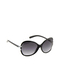

In [43]:
Image('16871.jpg')

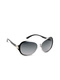

In [44]:
Image(filenames[indices[0][1]])

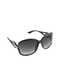

In [45]:
Image(filenames[indices[0][2]])

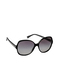

In [46]:
Image(filenames[indices[0][3]])

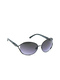

In [47]:
Image(filenames[indices[0][4]])

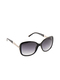

In [48]:
Image(filenames[indices[0][5]])